In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()

In [2]:
tel=pd.read_csv('Telecome1_csv')
tel.head()

customerID  tenure PhoneService        Contract PaperlessBilling  \
0  7590-VHVEG       1           No  Month-to-month              Yes   
1  5575-GNVDE      34          Yes        One year               No   
2  3668-QPYBK       2          Yes  Month-to-month              Yes   
3  7795-CFOCW      45           No        One year               No   
4  9237-HQITU       2          Yes  Month-to-month              Yes   

               PaymentMethod  MonthlyCharges TotalCharges Churn  \
0           Electronic check           29.85        29.85    No   
1               Mailed check           56.95       1889.5    No   
2               Mailed check           53.85       108.15   Yes   
3  Bank transfer (automatic)           42.30      1840.75    No   
4           Electronic check           70.70       151.65   Yes   

      MultipleLines  ... OnlineSecurity OnlineBackup DeviceProtection  \
0  No phone service  ...             No          Yes               No   
1                No  ...            Yes           No              Yes   
2                No  ...            Yes          Yes               No   
3  No phone service  ...            Yes           No              Yes   
4                No  ...             No           No               No   

  TechSupport StreamingTV StreamingMovies  gender SeniorCitizen  Partner  \
0          No          No              No  Female             0      Yes   
1          No          No              No    Male             0       No   
2          No          No              No    Male             0       No   
3         Yes          No              No    Male             0       No   
4          No          No              No  Female             0       No   

  Dependents  
0         No  
1         No  
2         No  
3         No  
4         No  

[5 rows x 21 columns]

In [3]:
tel.shape

(7043, 21)

In [4]:
tel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
dtypes: float64(1), int64(2), obj

In [5]:
tel.isnull().sum().sum()

0

In [6]:
tel['TotalCharges']=pd.to_numeric(tel['TotalCharges'],errors='coerce')

In [7]:
tel.isnull().sum().sum()

11

In [8]:
tel['TotalCharges'].fillna(value=0,inplace=True)

In [9]:
col=[]
for i in tel.columns:
    if tel[i].dtypes=='object':
        col.append(i)
        print(len(set(i)),'\t',i)

10 	 customerID
10 	 PhoneService
7 	 Contract
11 	 PaperlessBilling
11 	 PaymentMethod
5 	 Churn
10 	 MultipleLines
9 	 InternetService
11 	 OnlineSecurity
11 	 OnlineBackup
10 	 DeviceProtection
10 	 TechSupport
11 	 StreamingTV
13 	 StreamingMovies
5 	 gender
6 	 Partner
7 	 Dependents


In [10]:
tel1=tel.copy()
tel2=tel.copy()
tel3=tel.copy()

In [11]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for b in col:
    tel1[b]=le.fit_transform(tel1[b])

In [12]:
tel3['Churn']=le.fit_transform(tel3['Churn'])
# tel3['gender']=le.fit_transform(tel3['gender'])

In [13]:
tel1.head()

customerID  tenure  PhoneService  Contract  PaperlessBilling  \
0        5375       1             0         0                 1   
1        3962      34             1         1                 0   
2        2564       2             1         0                 1   
3        5535      45             0         1                 0   
4        6511       2             1         0                 1   

   PaymentMethod  MonthlyCharges  TotalCharges  Churn  MultipleLines  ...  \
0              2           29.85         29.85      0              1  ...   
1              3           56.95       1889.50      0              0  ...   
2              3           53.85        108.15      1              0  ...   
3              0           42.30       1840.75      0              1  ...   
4              2           70.70        151.65      1              0  ...   

   OnlineSecurity  OnlineBackup  DeviceProtection  TechSupport  StreamingTV  \
0               0             2                 0            0            0   
1               2             0                 2            0            0   
2               2             2                 0            0            0   
3               2             0                 2            2            0   
4               0             0                 0            0            0   

   StreamingMovies  gender  SeniorCitizen  Partner  Dependents  
0                0       0              0        1           0  
1                0       1              0        0           0  
2                0       1              0        0           0  
3                0       1              0        0           0  
4                0       0              0        0           0  

[5 rows x 21 columns]

In [14]:
tel1.corr()['Churn'].sort_values(ascending=False)[1:].iplot(kind='bar')

In [15]:
from sklearn.model_selection import train_test_split
x=tel1.drop(['Churn','customerID'],1)
y=tel1['Churn']
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x,y)
best_features1=pd.DataFrame(rfc.feature_importances_*100,index=x.columns,columns=['GINI'])
best_features1.sort_values('GINI',ascending=False).iplot(kind='bar')

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [17]:
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
rfc=RandomForestClassifier()
dtc=DecisionTreeClassifier()
lgr=LogisticRegression()
ada=AdaBoostClassifier()
gbc=GradientBoostingClassifier()
xgb=XGBClassifier()
fit=[rfc,dtc,lgr,ada,gbc,xgb]

In [18]:
for fi in fit:
    print(fi.fit(x_train,y_train))
    print()

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   interce

In [19]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
for fi3 in fit:
    if fi3==rfc:
        rfc_pred=fi3.predict(x_test)
        print('Random Forest','\n')
        print(accuracy_score(y_test,rfc_pred))
        print()
        print(classification_report(y_test,rfc_pred))
        print()
        print(confusion_matrix(y_test,rfc_pred),'\n')
    elif fi3==dtc:
        print('Desition Tree','\n')
        dtc_pred=fi3.predict(x_test)
        print(accuracy_score(y_test,dtc_pred))
        print()
        print(classification_report(y_test,dtc_pred))
        print()
        print(confusion_matrix(y_test,dtc_pred),'\n')
    elif fi3==lgr:
        lgr_pred=fi3.predict(x_test)
        print('Logistic Regression','\n')
        print(accuracy_score(y_test,lgr_pred))
        print()
        print(classification_report(y_test,lgr_pred))
        print()
        print(confusion_matrix(y_test,lgr_pred),'\n')
    elif fi3==ada:
        ada_pred=fi3.predict(x_test)
        print('Adaboost','\n')
        print(accuracy_score(y_test,ada_pred))
        print()
        print(classification_report(y_test,ada_pred))
        print()
        print(confusion_matrix(y_test,ada_pred),'\n')
    elif fi3==gbc:
        gbc_pred=fi3.predict(x_test)
        print('Gradiant boost','\n')
        print(accuracy_score(y_test,gbc_pred))
        print()
        print(classification_report(y_test,gbc_pred))
        print()
        print(confusion_matrix(y_test,gbc_pred),'\n')
    else:
        xgb_pred=fi3.predict(x_test)
        print('XG boost','\n')
        print(accuracy_score(y_test,xgb_pred))
        print()
        print(classification_report(y_test,xgb_pred))
        print()
        print(confusion_matrix(y_test,xgb_pred))
        

Random Forest 

0.7827733080927591

              precision    recall  f1-score   support

           0       0.81      0.92      0.86      1539
           1       0.66      0.41      0.51       574

    accuracy                           0.78      2113
   macro avg       0.73      0.67      0.68      2113
weighted avg       0.77      0.78      0.77      2113


[[1416  123]
 [ 336  238]] 

Desition Tree 

0.7283483199242783

              precision    recall  f1-score   support

           0       0.81      0.82      0.81      1539
           1       0.50      0.49      0.49       574

    accuracy                           0.73      2113
   macro avg       0.66      0.65      0.65      2113
weighted avg       0.73      0.73      0.73      2113


[[1260  279]
 [ 295  279]] 

Logistic Regression 

0.8050165641268339

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1539
           1       0.67      0.56      0.61       574

    accu

## Get Dummies

In [20]:
tel2.drop('customerID',axis=1,inplace=True)
tel2=pd.get_dummies(tel2,drop_first=True)
tel2.head()

tenure  MonthlyCharges  TotalCharges  SeniorCitizen  PhoneService_Yes  \
0       1           29.85         29.85              0                 0   
1      34           56.95       1889.50              0                 1   
2       2           53.85        108.15              0                 1   
3      45           42.30       1840.75              0                 0   
4       2           70.70        151.65              0                 1   

   Contract_One year  Contract_Two year  PaperlessBilling_Yes  \
0                  0                  0                     1   
1                  1                  0                     0   
2                  0                  0                     1   
3                  1                  0                     0   
4                  0                  0                     1   

   PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  ...  \
0                                      0                               1  ...   
1                                      0                               0  ...   
2                                      0                               0  ...   
3                                      0                               0  ...   
4                                      0                               1  ...   

   DeviceProtection_Yes  TechSupport_No internet service  TechSupport_Yes  \
0                     0                                0                0   
1                     1                                0                0   
2                     0                                0                0   
3                     1                                0                1   
4                     0                                0                0   

   StreamingTV_No internet service  StreamingTV_Yes  \
0                                0                0   
1                                0                0   
2                                0                0   
3                                0                0   
4                                0                0   

   StreamingMovies_No internet service  StreamingMovies_Yes  gender_Male  \
0                                    0                    0            0   
1                                    0                    0            1   
2                                    0                    0            1   
3                                    0                    0            1   
4                                    0                    0            0   

   Partner_Yes  Dependents_Yes  
0            1               0  
1            0               0  
2            0               0  
3            0               0  
4            0               0  

[5 rows x 31 columns]

In [21]:
tel2.isnull().sum().sum()

0

In [22]:
tel2.corr()['Churn_Yes'].sort_values(ascending=False)[1:].iplot(kind='bar')

In [23]:
np.abs(tel2.corr()['Churn_Yes']).sort_values(ascending=False)[1:].iplot(kind='bar')

In [24]:
from sklearn.model_selection import train_test_split
x1=tel2.drop(['Churn_Yes'],1)
y1=tel2['Churn_Yes']
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x1,y1)
best_features2=pd.DataFrame(rfc.feature_importances_*100,index=x1.columns,columns=['GINI'])
best_features2.sort_values('GINI',ascending=False).iplot(kind='bar')

In [25]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.3,random_state=42)

In [26]:
rfc=RandomForestClassifier()
dtc=DecisionTreeClassifier()
lgr=LogisticRegression()
ada=AdaBoostClassifier()
gbc=GradientBoostingClassifier()
fit=[rfc,dtc,lgr,ada,gbc,xgb]

In [27]:
for fi in fit:
    print(fi.fit(x1_train,y1_train))
    print()

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   interce

In [28]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
for fi3 in fit:
    if fi3==rfc:
        rfc_pred=fi3.predict(x1_test)
        print('Random Forest','\n')
        print(accuracy_score(y1_test,rfc_pred))
        print()
        print(classification_report(y1_test,rfc_pred))
        print()
        print(confusion_matrix(y1_test,rfc_pred),'\n')
    elif fi3==dtc:
        print('Desition Tree','\n')
        dtc_pred=fi3.predict(x1_test)
        print(accuracy_score(y1_test,dtc_pred))
        print()
        print(classification_report(y1_test,dtc_pred))
        print()
        print(confusion_matrix(y1_test,dtc_pred),'\n')
    elif fi3==lgr:
        lgr_pred=fi3.predict(x1_test)
        print('Logistic Regression','\n')
        print(accuracy_score(y1_test,lgr_pred))
        print()
        print(classification_report(y1_test,lgr_pred))
        print()
        print(confusion_matrix(y1_test,lgr_pred),'\n')
    elif fi3==ada:
        ada_pred=fi3.predict(x1_test)
        print('Adaboost','\n')
        print(accuracy_score(y1_test,ada_pred))
        print()
        print(classification_report(y1_test,ada_pred))
        print()
        print(confusion_matrix(y1_test,ada_pred),'\n')
    elif fi3==gbc:
        gbc_pred=fi3.predict(x1_test)
        print('Gradiant boost','\n')
        print(accuracy_score(y1_test,gbc_pred))
        print()
        print(classification_report(y1_test,gbc_pred))
        print()
        print(confusion_matrix(y1_test,gbc_pred),'\n')
    else:
        xgb_pred=fi3.predict(x1_test)
        print('XG boost','\n')
        print(accuracy_score(y1_test,xgb_pred))
        print()
        print(classification_report(y1_test,xgb_pred))
        print()
        print(confusion_matrix(y1_test,xgb_pred))

Random Forest 

0.780407004259347

              precision    recall  f1-score   support

           0       0.81      0.92      0.86      1539
           1       0.65      0.41      0.50       574

    accuracy                           0.78      2113
   macro avg       0.73      0.66      0.68      2113
weighted avg       0.76      0.78      0.76      2113


[[1413  126]
 [ 338  236]] 

Desition Tree 

0.7378135352579271

              precision    recall  f1-score   support

           0       0.82      0.82      0.82      1539
           1       0.52      0.52      0.52       574

    accuracy                           0.74      2113
   macro avg       0.67      0.67      0.67      2113
weighted avg       0.74      0.74      0.74      2113


[[1261  278]
 [ 276  298]] 

Logistic Regression 

0.8102224325603408

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1539
           1       0.68      0.57      0.62       574

    accur

In [29]:
best_features1.sort_values('GINI',ascending=False,inplace=True)

In [30]:
col1=list(best_features1.index[:5])
col1

['MonthlyCharges', 'TotalCharges', 'tenure', 'Contract', 'PaymentMethod']

In [31]:
best_features2.sort_values('GINI',ascending=False,inplace=True)

In [32]:
col2=list(best_features2.index[:5])
col2

['TotalCharges',
 'tenure',
 'MonthlyCharges',
 'Contract_Two year',
 'InternetService_Fiber optic']

In [33]:
# a=1
# for t1 in col1:
#     plt.subplot(3,2,a)
#     sns.barplot(x=tel1[t1],y=tel1['Churn'],hue=tel1['TotalCharges'])
#     a+=1

In [34]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import pandas as pd
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode()

fig = go.Figure()
for t1 in col1:
    fig.add_bar(x=tel1['Churn'], y=tel1[t1],name=t1)
# iplot(fig)
plot_url=py.plot(fig)

In [35]:


labels = ['Churn', 'Retained']
values = [100*tel['Churn'].value_counts()['Yes']/7043,100*tel['Churn'].value_counts()['No']/7043]

# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.show()

In [36]:
tel.columns
chu=tel.groupby(['OnlineSecurity']).count()['Churn']/7043*100
chu.iplot(kind='bar')

In [37]:
chu

OnlineSecurity
No                     49.666335
No internet service    21.666903
Yes                    28.666761
Name: Churn, dtype: float64

In [38]:
tel.columns

Index(['customerID', 'tenure', 'PhoneService', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'gender', 'SeniorCitizen', 'Partner', 'Dependents'],
      dtype='object')

In [39]:
tel3.iplot(x='PaymentMethod',y='Churn',kind='bar')

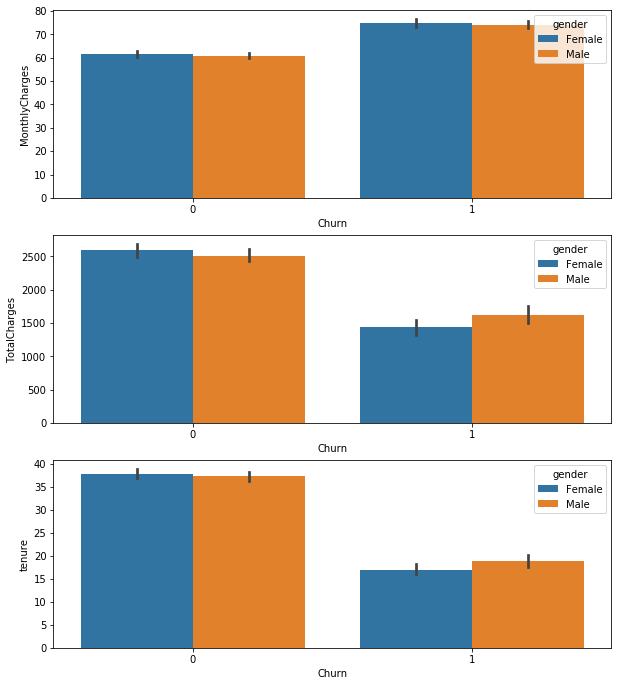

In [40]:
a=1
plt.figure(figsize=(10,20))
for t1 in col1[:3]:
    plt.subplot(5,1,a)
    sns.barplot(x=tel3['Churn'],y=tel3[t1],hue=tel3['gender'])
    a+=1
    

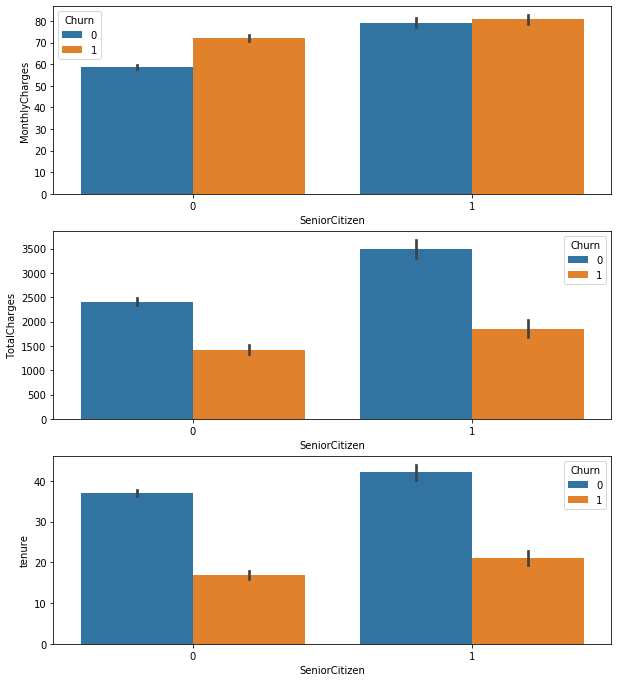

In [41]:
a=1
plt.figure(figsize=(10,20))
for t1 in col1[:3]:
    plt.subplot(5,1,a)
    sns.barplot(x=tel3['SeniorCitizen'],y=tel3[t1],hue=tel3['Churn'])
    a+=1

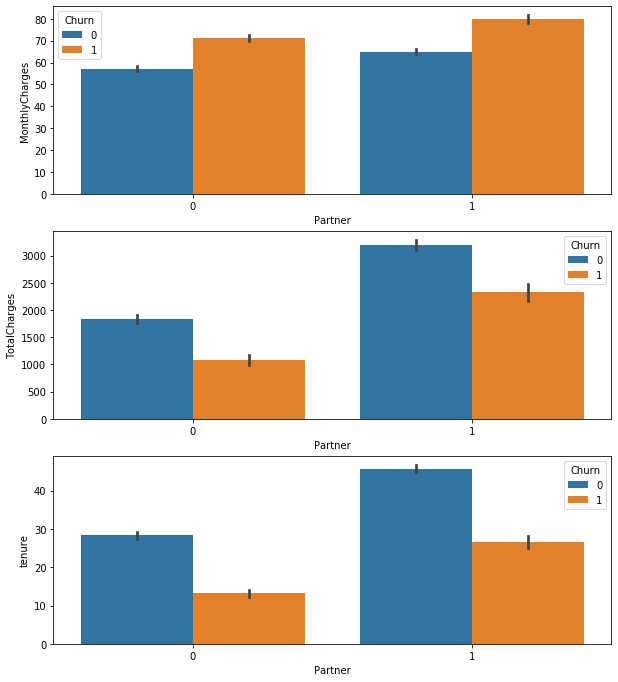

In [42]:
a=1
plt.figure(figsize=(10,20))
for t1 in col1[:3]:
    plt.subplot(5,1,a)
    sns.barplot(x=tel1['Partner'],y=tel3[t1],hue=tel3['Churn'])
    a+=1

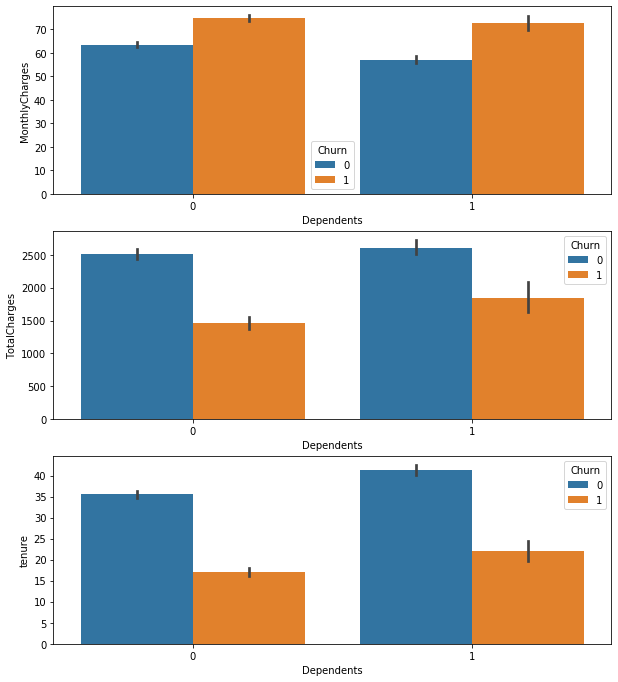

In [43]:
a=1
plt.figure(figsize=(10,20))
for t1 in col1[:3]:
    plt.subplot(5,1,a)
    sns.barplot(x=tel1['Dependents'],y=tel3[t1],hue=tel3['Churn'])
    a+=1

In [44]:
col3=['PaymentMethod','MultipleLines','InternetService','OnlineSecurity']
col3

['PaymentMethod', 'MultipleLines', 'InternetService', 'OnlineSecurity']

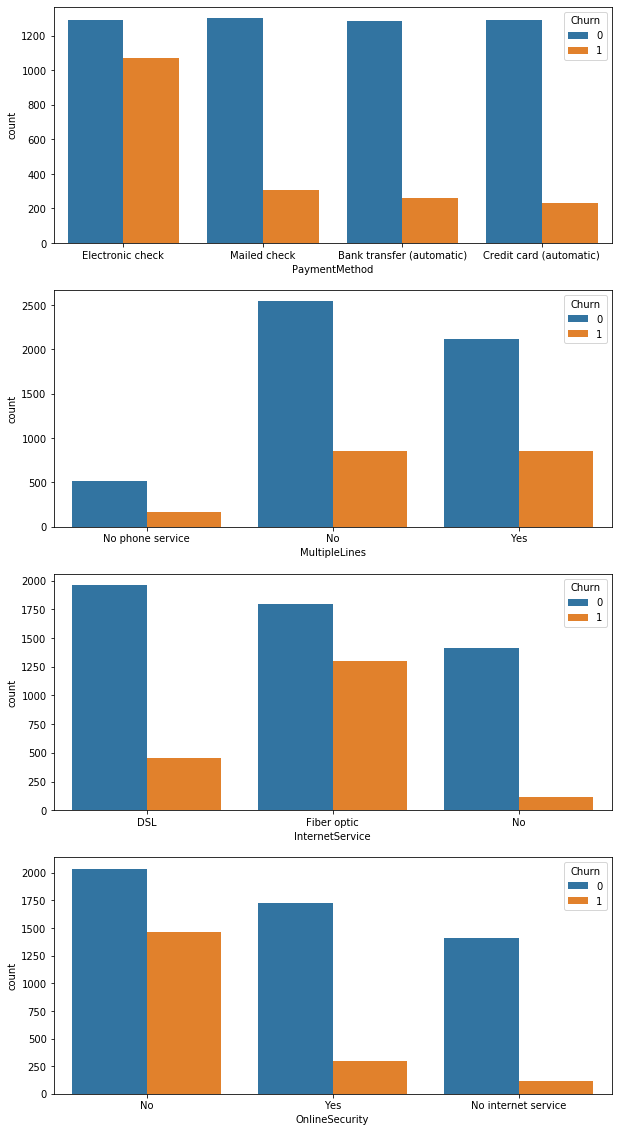

In [45]:
d=1
plt.figure(figsize=(10,20))
for c in col3:
    plt.subplot(4,1,d)
    sns.countplot(data=tel3,x=c,hue='Churn')
    d+=1

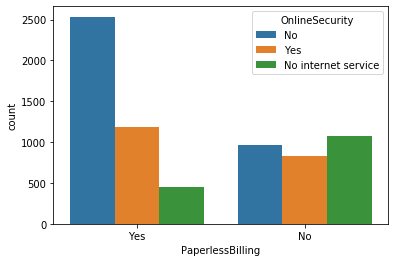

In [46]:
sns.countplot(data=tel3,x='PaperlessBilling',hue='OnlineSecurity')

In [47]:
tel3[tel3['InternetService']=='DSL']['MonthlyCharges'].max()

94.8

Text(0.5, 0, 'TotalCharges')

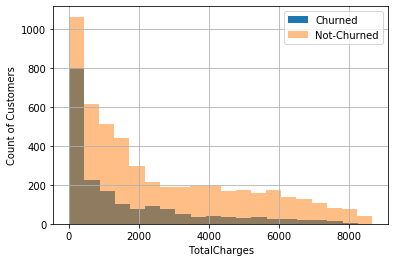

In [48]:
tel3.TotalCharges[tel3.Churn==1].hist(bins=20)
tel3.TotalCharges[tel3.Churn==0].hist(bins=20,alpha=0.5)
plt.legend(['Churned','Not-Churned'])
plt.ylabel('Count of Customers')
plt.xlabel('TotalCharges')

Text(0.5, 0, 'Monthly Charges')

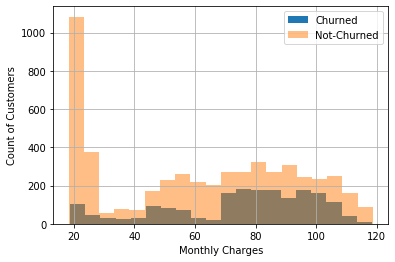

In [49]:
tel3.MonthlyCharges[tel3.Churn==1].hist(bins=20)
tel3.MonthlyCharges[tel3.Churn==0].hist(bins=20,alpha=0.5)
plt.legend(['Churned','Not-Churned'])
plt.ylabel('Count of Customers')
plt.xlabel('Monthly Charges')

In [50]:
from sklearn.utils import resample

In [111]:
X=pd.concat([x_train,y_train],axis=1)
X_major=X[X.Churn==0]
X_minor=X[X.Churn==1]
# Upsample minority class
X_downsample= resample(X_major, 
                     replace=True,     # sample with replacement
                     n_samples=len(X_minor),    # to match majority class
                     random_state=123) # reproducible results
X_downsampled= pd.concat([X_minor,X_downsample])

X_upsample= resample(X_minor, 
                     replace=True,     # sample with replacement
                     n_samples=len(X_major),    # to match majority class
                     random_state=123) # reproducible results
X_upsampled= pd.concat([X_major,X_upsample])


In [112]:
# X_train=X_upsampled.drop('Churn',1)
# Y_train=X_upsampled['Churn']

In [113]:
# from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
# pred={rfc:rfc_pred,dtc:dtc_pred,lgr:lgr_pred,ada:ada_pred,gbc:gbc_pred,xgb:xgb_pred}
# for k,v in pred.items():   
#     v=k.predict(x_test)
#     print(str(k).split('(')[0])
#     print()
#     print(accuracy_score(y_test,v))
#     print()
#     print(confusion_matrix(y_test,v))
#     print()
#     print(classification_report(y_test,v))

In [114]:
X_upsampled.Churn.value_counts()

1    3635
0    3635
Name: Churn, dtype: int64

In [115]:
X_downsampled.Churn.value_counts()

1    1295
0    1295
Name: Churn, dtype: int64

## Up Sampling

In [122]:
X_train=X_upsampled.drop('Churn',1)
Y_train=X_upsampled['Churn']

In [123]:
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
rfc=RandomForestClassifier()
dtc=DecisionTreeClassifier()
lgr=LogisticRegression()
ada=AdaBoostClassifier()
gbc=GradientBoostingClassifier()
xgb=XGBClassifier()
bnb=BernoulliNB()
knn=KNeighborsClassifier()
fit=[rfc,dtc,lgr,ada,gbc,xgb,bnb,knn]

In [124]:
for fi in fit:
    print(fi.fit(X_train,Y_train))
    print()

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   interce

In [138]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn import metrics
pred={rfc:'rfc_pred',dtc:'dtc_pred',lgr:'lgr_pred',ada:'ada_pred',gbc:'gbc_pred',xgb:'xgb_pred',bnb:'bnb_pred',knn:'knn_pred'}
prob={rfc:'rfc_pred_prob',dtc:'dtc_pred_prob',lgr:'lgr_pred_prob',ada:'ada_pred_prob',gbc:'gbc_pred_prob',xgb:'xgb_pred_prob',bnb:'bnb_pred_prob',knn:'knn_pred_prob'}
acc=[]
pre=[]
rec=[]
fsc=[]
auc=[]
index=[]
for k,v in pred.items():   
    v=k.predict(x_test)
    print(str(k).split('(')[0])
    print()
    print(accuracy_score(y_test,v))
    print()
    print(confusion_matrix(y_test,v))
    print()
    print(classification_report(y_test,v))
    index.append(str(k).split('(')[0])
    acc.append(100*round(accuracy_score(y_test,v),2))
    pre.append(100*round(metrics.precision_score(y_test,v,average='macro'),2))
    rec.append(100*round(metrics.recall_score(y_test,v,average='macro'),2))
    fsc.append(100*round(metrics.f1_score(y_test,v,average='macro'),2))

for k1,v1 in prob.items():
    v1=k1.predict_proba(x_test)[::,1]
    auc.append(100*round(metrics.roc_auc_score(y_test,v1),3))

RandomForestClassifier

0.7255087553241836

[[1124  415]
 [ 165  409]]

              precision    recall  f1-score   support

           0       0.87      0.73      0.79      1539
           1       0.50      0.71      0.59       574

    accuracy                           0.73      2113
   macro avg       0.68      0.72      0.69      2113
weighted avg       0.77      0.73      0.74      2113

DecisionTreeClassifier

0.673450070989115

[[1025  514]
 [ 176  398]]

              precision    recall  f1-score   support

           0       0.85      0.67      0.75      1539
           1       0.44      0.69      0.54       574

    accuracy                           0.67      2113
   macro avg       0.64      0.68      0.64      2113
weighted avg       0.74      0.67      0.69      2113

LogisticRegression

0.7567439659252247

[[1117  422]
 [  92  482]]

              precision    recall  f1-score   support

           0       0.92      0.73      0.81      1539
           1       0.53   

In [139]:
acc_data=pd.DataFrame(columns=index,data=[acc,pre,rec,fsc,auc],index=['Accurecy_Score','Precesion','Recall','f1_score','AUC'])
acc_data.transpose()

Accurecy_Score  Precesion  Recall  f1_score   AUC
RandomForestClassifier                73.0       68.0    72.0      69.0  80.4
DecisionTreeClassifier                67.0       64.0    68.0      64.0  68.0
LogisticRegression                    76.0       73.0    78.0      73.0  85.5
AdaBoostClassifier                    75.0       72.0    78.0      72.0  85.3
GradientBoostingClassifier            74.0       72.0    77.0      72.0  85.1
XGBClassifier                         74.0       72.0    78.0      72.0  85.4
BernoulliNB                           73.0       71.0    76.0      71.0  81.8
KNeighborsClassifier                  69.0       66.0    69.0      65.0  75.0

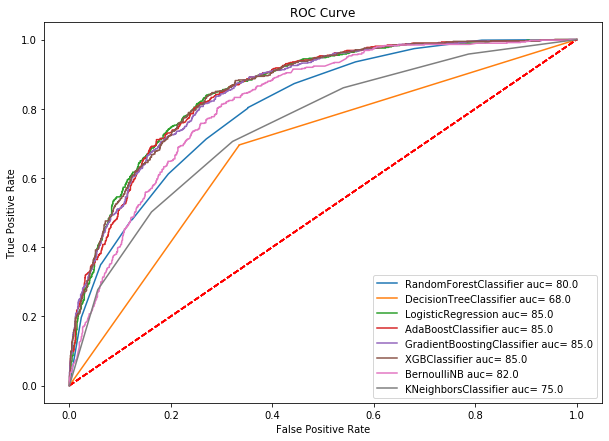

In [142]:
plt.figure(figsize=(10,7))
for fit1 in fit:
    y_pred_pro=fit1.predict_proba(x_test)[::,1]
    fpr,tpr,thresholds=metrics.roc_curve(y_test,y_pred_pro)
    auc=100*round(metrics.roc_auc_score(y_test,y_pred_pro),2)
    plt.plot([0,1],[0,1],'r--')
    plt.plot(fpr,tpr,label=(str(fit1).split('(')[0])+' auc= '+str(auc))
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()

## Down Sampling

In [127]:
X_train1=X_downsampled.drop('Churn',1)
Y_train1=X_downsampled['Churn']

In [128]:
for fi in fit:
    print(fi.fit(X_train1,Y_train1))
    print()

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   interce

In [146]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn import metrics
pred={rfc:'rfc_pred',dtc:'dtc_pred',lgr:'lgr_pred',ada:'ada_pred',gbc:'gbc_pred',xgb:'xgb_pred',bnb:'bnb_pred',knn:'knn_pred'}
prob={rfc:'rfc_pred_prob',dtc:'dtc_pred_prob',lgr:'lgr_pred_prob',ada:'ada_pred_prob',gbc:'gbc_pred_prob',xgb:'xgb_pred_prob',bnb:'bnb_pred_prob',knn:'knn_pred_prob'}
acc=[]
pre=[]
rec=[]
fsc=[]
auc=[]
index=[]
for k,v in pred.items():   
    v=k.predict(x_test)
    print(str(k).split('(')[0])
    print()
    print(accuracy_score(y_test,v))
    print()
    print(confusion_matrix(y_test,v))
    print()
    print(classification_report(y_test,v))
    index.append(str(k).split('(')[0])
    acc.append(100*round(accuracy_score(y_test,v),2))
    pre.append(100*round(metrics.precision_score(y_test,v,average='macro'),2))
    rec.append(100*round(metrics.recall_score(y_test,v,average='macro'),2))
    fsc.append(100*round(metrics.f1_score(y_test,v,average='macro'),2))

for k1,v1 in prob.items():
    v1=k1.predict_proba(x_test)[::,1]
    auc.append(100*round(metrics.roc_auc_score(y_test,v1),3))

RandomForestClassifier

0.7255087553241836

[[1124  415]
 [ 165  409]]

              precision    recall  f1-score   support

           0       0.87      0.73      0.79      1539
           1       0.50      0.71      0.59       574

    accuracy                           0.73      2113
   macro avg       0.68      0.72      0.69      2113
weighted avg       0.77      0.73      0.74      2113

DecisionTreeClassifier

0.673450070989115

[[1025  514]
 [ 176  398]]

              precision    recall  f1-score   support

           0       0.85      0.67      0.75      1539
           1       0.44      0.69      0.54       574

    accuracy                           0.67      2113
   macro avg       0.64      0.68      0.64      2113
weighted avg       0.74      0.67      0.69      2113

LogisticRegression

0.7567439659252247

[[1117  422]
 [  92  482]]

              precision    recall  f1-score   support

           0       0.92      0.73      0.81      1539
           1       0.53   

In [147]:
acc_data=pd.DataFrame(columns=index,data=[acc,pre,rec,fsc,auc],index=['Accurecy_Score','Precesion','Recall','f1_score','AUC'])
acc_data.transpose()

Accurecy_Score  Precesion  Recall  f1_score   AUC
RandomForestClassifier                73.0       68.0    72.0      69.0  80.4
DecisionTreeClassifier                67.0       64.0    68.0      64.0  68.0
LogisticRegression                    76.0       73.0    78.0      73.0  85.5
AdaBoostClassifier                    75.0       72.0    78.0      72.0  85.3
GradientBoostingClassifier            74.0       72.0    77.0      72.0  85.1
XGBClassifier                         74.0       72.0    78.0      72.0  85.4
BernoulliNB                           73.0       71.0    76.0      71.0  81.8
KNeighborsClassifier                  69.0       66.0    69.0      65.0  75.0

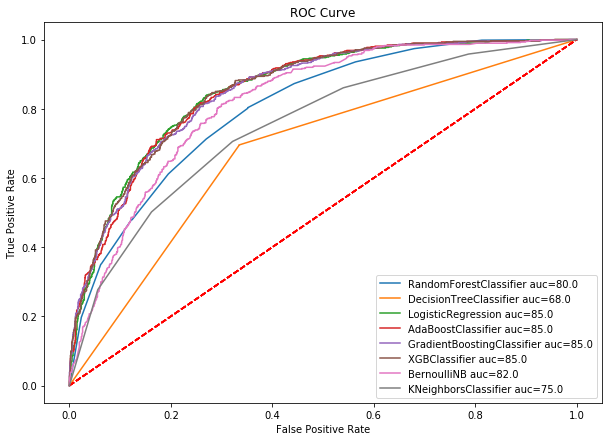

In [149]:
plt.figure(figsize=(10,7))
for fit1 in fit:
    y_pred_pro=fit1.predict_proba(x_test)[::,1]
    fpr,tpr,thresholds=metrics.roc_curve(y_test,y_pred_pro)
    auc=100*round(metrics.roc_auc_score(y_test,y_pred_pro),2)
    plt.plot([0,1],[0,1],'r--')
    plt.plot(fpr,tpr,label=(str(fit1).split('(')[0])+' auc='+str(auc))
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()